In [1]:
import pandas as pd
import numpy as np
import datetime
import sqlite3
from pandas.tseries.holiday import USFederalHolidayCalendar as uscal

import requests
import json

import matplotlib.pyplot as plt
import seaborn as sns

#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.inspection import permutation_importance

import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR
%matplotlib inline

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
model_prepx = pd.read_csv('Zinfanel_all.csv')

In [3]:
model_prepx['usage_hour_before'] = model_prepx['interval_kWh'].shift(1)
model_prep = model_prepx.dropna(subset=['usage_hour_before'])

In [4]:
training = model_prep[model_prep['timestamp'] < '2020-07-20 00:00:00']
testing = model_prep[model_prep['timestamp'] > '2020-12-04 00:00:00']

In [5]:
len(training), len(testing)

(1967, 3790)

### Linear Regressor 

In [6]:
# Modeling - baseline
y = training['interval_kWh']
X = training[['temp', 'pressure', 'humidity', 
                'sunlight_No', 'sunlight_Yes', 'hour']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr_mod = lr.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.3715069833361012, 0.36324522109800234)

### RFC Regressor

In [7]:
regressor = RandomForestRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.10323716881355907, 0.26383278048780484)

### XG-Boost Regressor

In [8]:
regressor = xgboost.XGBRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


(0.07021493302374374, 0.2920868944005269)

### Support Vector Regressor

In [9]:
regressor = SVR()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(1.0825153724735614, 1.1330319689017185)

### Extra Tree Regressor

In [10]:
regressor = ExtraTreesRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(2.169491529899608e-06, 0.2761247967479674)

### Bagging Regressor

In [11]:
regressor = BaggingRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.11232764745762717, 0.2804772357723578)

### Gradient Boosting Regressor

In [12]:
regressor = GradientBoostingRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)
y_predt = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt),mean_absolute_error(y_test, y_pred)

(0.24355920835584005, 0.2736444934581158)

## Further tuning & Additional Variables
**Testing models:**
- RFC
- Extra Tree

**Additional Features:**
- Season
- Temperature from the hour before
- Working day vs non-working day

### Feature Selection

In [19]:
y = training['interval_kWh']
X = training[['temp', 'pressure', 'humidity', 'usage_hour_before',
                'sunlight_No', 'sunlight_Yes', 'hour', 'hour_before', 'workday_0', "workday_1",
               'season_Fall', 'season_Winter', 'season_Spring', 'season_Summer']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.25, shuffle = False)

In [20]:
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores

C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [10 11] are constant.
  UserWarning)
C:\Users\szhang\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0,0
0,temp,27.341681
1,pressure,1.632678
2,humidity,17.691519
3,usage_hour_before,55.836844
4,sunlight_No,356.642856
5,sunlight_Yes,356.642856
6,hour,6.320945
7,hour_before,20.352020
8,workday_0,1.972259
9,workday_1,1.972259


### RFC 

In [21]:
# More features for RFC
regressor = RandomForestRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred_rfc = lr_mod.predict(X_test)
y_predt_rfc = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt_rfc),mean_absolute_error(y_test, y_pred_rfc)

(0.06690242711864405, 0.23310951219512166)

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


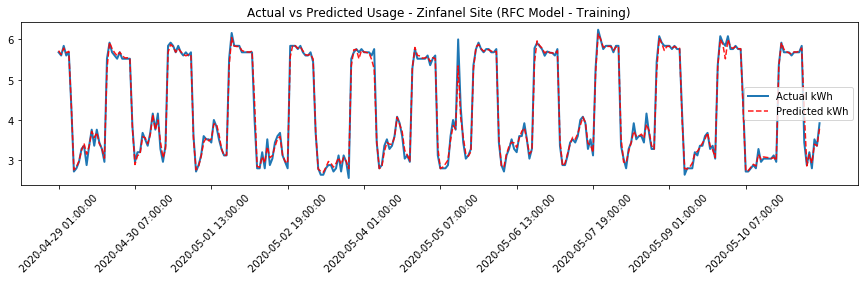

In [22]:
# Sample visualization for RFC results on training dataset
plt.figure(figsize=(15,3))
plt.plot(training['timestamp'][0:300], y_train[0:300], linewidth = 2, label = 'Actual kWh')
plt.plot(training['timestamp'][0:300], y_predt_rfc[0:300], alpha=0.9, color = 'r', linestyle = '--', label = 'Predicted kWh')
plt.xticks(training['timestamp'][0:300:30], rotation = 45)
plt.title('Actual vs Predicted Usage - Zinfanel Site (RFC Model - Training)')
plt.legend()

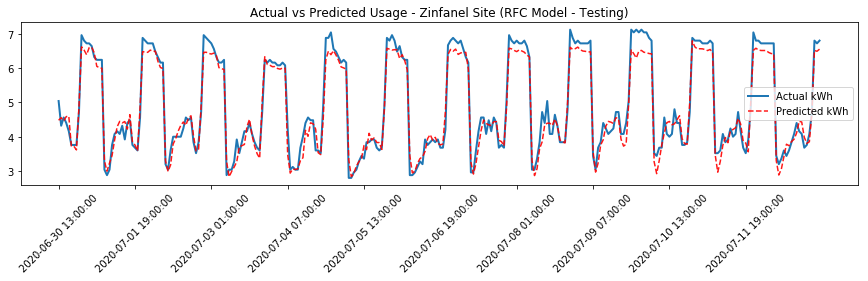

In [23]:
plt.figure(figsize=(15,3))
plt.plot(training['timestamp'][1500:1800], y_test[0:300], linewidth = 2, label = 'Actual kWh')
plt.plot(training['timestamp'][1500:1800], y_pred_rfc[0:300], alpha=0.9, color = 'r', linestyle = '--', label = 'Predicted kWh')
plt.xticks(training['timestamp'][1500:1800:30], rotation = 45)
plt.title('Actual vs Predicted Usage - Zinfanel Site (RFC Model - Testing)')
plt.legend()

### Extra Trees

In [24]:
# More features for RFC
regressor = ExtraTreesRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred_et = lr_mod.predict(X_test)
y_predt_et = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt_et),mean_absolute_error(y_test, y_pred_et)

(4.121750022269395e-15, 0.23797585365853574)

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


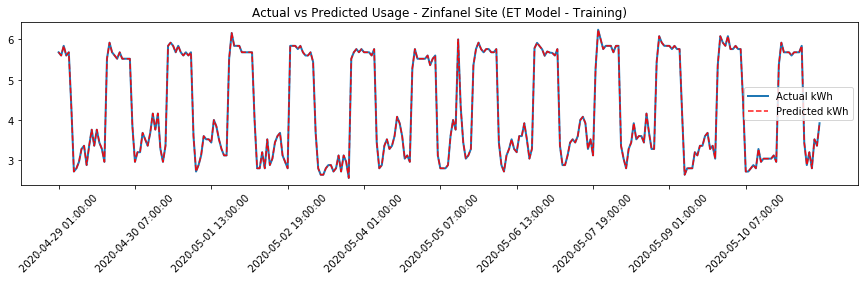

In [25]:
plt.figure(figsize=(15,3))
plt.plot(training['timestamp'][0:300], y_train[0:300], linewidth = 2, label = 'Actual kWh')
plt.plot(training['timestamp'][0:300], y_predt_et[0:300], alpha=0.9, color = 'r', linestyle = '--', label = 'Predicted kWh')
plt.xticks(training['timestamp'][0:300:30], rotation = 45)
plt.title('Actual vs Predicted Usage - Zinfanel Site (ET Model - Training)')
plt.legend()

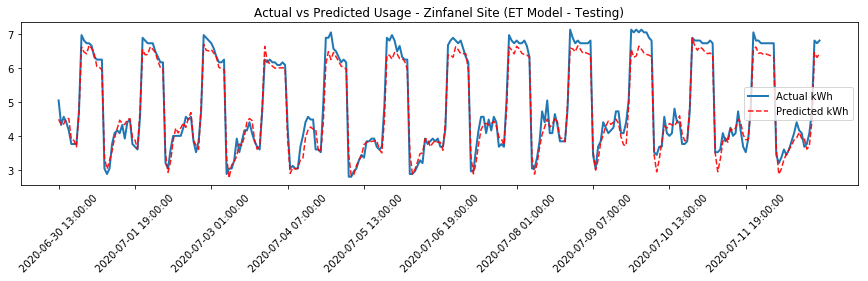

In [26]:
plt.figure(figsize=(15,3))
plt.plot(training['timestamp'][1500:1800], y_test[0:300], linewidth = 2, label = 'Actual kWh')
plt.plot(training['timestamp'][1500:1800], y_pred_et[0:300], alpha=0.9, color = 'r', linestyle = '--', label = 'Predicted kWh')
plt.xticks(training['timestamp'][1500:1800:30], rotation = 45)
plt.title('Actual vs Predicted Usage - Zinfanel Site (ET Model - Testing)')
plt.legend()

### Overall:
- Extra Tree performs slightly better on testing set but with a bit of overfitting issues
- Extra Tree is performing close to perfect for training set

## Full Dataset Pre-retrofit Training & Post-retrofit Prediction

In [27]:
y_train = training['interval_kWh']
X_train = training[['temp', 'pressure', 'humidity', 'usage_hour_before',
                'sunlight_No', 'sunlight_Yes', 'hour', 'hour_before', 'workday_0', "workday_1",
               'season_Fall', 'season_Winter', 'season_Spring', 'season_Summer']]
y_test= testing['interval_kWh']
X_test = testing[['temp', 'pressure', 'humidity', 'usage_hour_before',
                'sunlight_No', 'sunlight_Yes', 'hour', 'hour_before', 'workday_0', "workday_1",
               'season_Fall', 'season_Winter', 'season_Spring', 'season_Summer']]

### RFC

In [28]:
regressor = RandomForestRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred_rfc = lr_mod.predict(X_test)
y_predt_rfc = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt_rfc)

0.06661984748347727

In [29]:
training['pred_usage'] = y_predt_rfc
testing['pred_usage'] = y_pred_rfc

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


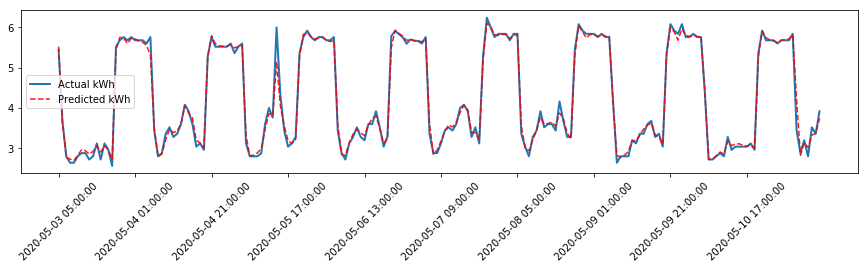

In [30]:
plt.figure(figsize=(15,3))
plt.plot(training['timestamp'][100:300], training['interval_kWh'][100:300], linewidth = 2, label = 'Actual kWh')
plt.plot(training['timestamp'][100:300], training['pred_usage'][100:300], alpha=0.9, color = 'r', linestyle = '--', label = 'Predicted kWh')
plt.xticks(training['timestamp'][100:300:20], rotation = 45)
plt.legend()

### ET

In [31]:
regressor = ExtraTreesRegressor()
lr_mod = regressor.fit(X_train, y_train)
y_pred_et = lr_mod.predict(X_test)
y_predt_et = lr_mod.predict(X_train)
mean_absolute_error(y_train, y_predt_et)

4.536166956943294e-15

In [32]:
training['pred_usage_et'] = y_predt_et
testing['pred_usage_et'] = y_pred_et

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


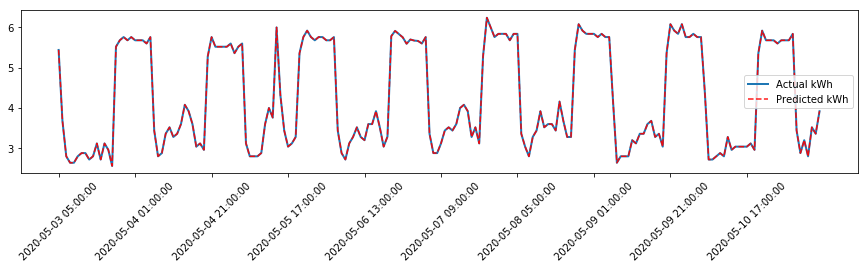

In [33]:
plt.figure(figsize=(15,3))
plt.plot(training['timestamp'][100:300], training['interval_kWh'][100:300], linewidth = 2, label = 'Actual kWh')
plt.plot(training['timestamp'][100:300], training['pred_usage_et'][100:300], alpha=0.9, color = 'r', linestyle = '--', label = 'Predicted kWh')
plt.xticks(training['timestamp'][100:300:20], rotation = 45)
plt.legend()

### Saving calculation using RFC

In [34]:
bills = pd.read_csv('Zinfandel electric #3.csv')
bills.columns

Index(['meter_uid', 'utility', 'utility_service_id', 'utility_billing_account',
       'utility_service_address', 'utility_meter_number',
       'utility_tariff_name', 'bill_start_date', 'bill_end_date', 'bill_days',
       'bill_statement_date', 'bill_total_kWh', 'bill_total', 'source',
       'updated', 'bill_volume', 'bill_total_unit', 'Demand_cost', 'Demand_kw',
       'supplier_1_total_cost', 'supplier_1_service_id', 'supplier_1_tariff',
       'supplier_1_total_volume', 'supplier_1_name', 'supplier_1_type',
       'supplier_1_total_unit', 'pge_details_net_generation',
       'pge_details_baseline_territory', 'pge_details_serial',
       'pge_details_consumption', 'pge_details_rotating_outage_block'],
      dtype='object')

In [35]:
bill = bills[['bill_start_date', 'bill_end_date', 'bill_days',
       'bill_total_kWh', 'bill_total', 'bill_volume',  'Demand_cost', 'Demand_kw']]

In [36]:
bill['s_timestamp'] = pd.to_datetime(bill['bill_start_date'])
bill['e_timestamp'] = pd.to_datetime(bill['bill_end_date'])
testing['timestamp'] = pd.to_datetime(testing['timestamp'])
training['timestamp'] = pd.to_datetime(training['timestamp'])

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [37]:
bill['pred_usage'] = 0
for i in range(len(bill)):
    if i < 4:
        bill['pred_usage'][i] = sum(testing[(testing['timestamp'] >= bill['s_timestamp'][i]) & (testing['timestamp'] < bill['e_timestamp'][i])]['pred_usage'])
        
    if i > 9:
        bill['pred_usage'][i] = sum(training[(training['timestamp'] >= bill['s_timestamp'][i]) & (training['timestamp'] < bill['e_timestamp'][i])]['pred_usage'])

C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\szhang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [38]:
bill.head(12)

,bill_start_date,bill_end_date,bill_days,bill_total_kWh,bill_total,bill_volume,Demand_cost,Demand_kw,s_timestamp,e_timestamp,pred_usage
0,03/15/2021,04/14/2021,30,2868.08,704.73,2868.08,95.33,6.08,2021-03-15,2021-04-14,2997
1,02/11/2021,03/15/2021,32,2970.96,690.91,2970.96,82.96,5.76,2021-02-11,2021-03-15,3238
2,01/12/2021,02/11/2021,30,2831.36,680.58,2831.36,85.82,6.40,2021-01-12,2021-02-11,3191
3,12/11/2020,01/12/2021,32,3061.12,713.54,3061.12,82.49,6.40,2020-12-11,2021-01-12,3329
4,11/12/2020,12/11/2020,29,2801.40,654.29,2801.40,89.66,7.36,2020-11-12,2020-12-11,0
5,10/13/2020,11/12/2020,30,3249.52,835.26,3249.52,116.05,6.40,2020-10-13,2020-11-12,0
6,09/11/2020,10/13/2020,32,3368.08,955.94,3368.08,153.77,7.36,2020-09-11,2020-10-13,0
7,08/12/2020,09/11/2020,30,3256.32,915.38,3256.32,147.44,6.72,2020-08-12,2020-09-11,0
8,07/13/2020,08/12/2020,30,3286.88,935.27,3286.88,161.48,7.36,2020-07-13,2020-08-12,0
9,06/12/2020,07/13/2020,31,3561.36,992.72,3561.36,161.48,7.36,2020-06-12,2020-07-13,0
